# Stock Prices Prediction Using Keras Long Term Short Memory

In [85]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import math

In [2]:
# Importing the training set
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [21]:
dataset_train.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [41]:
df1 = dataset_train.reset_index()['Close']

df1.shape

(2035,)

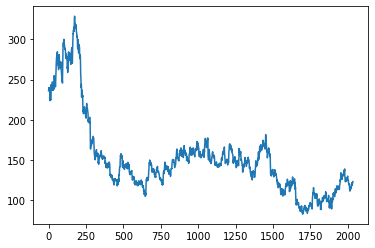

In [30]:
plt.plot(df1)

In [57]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
df1 = sc.fit_transform(np.array(df1).reshape(-1, 1))

In [59]:
df1.shape

(2035, 1)

In [64]:
training_size = int(len(df1)*0.65)
test_size = len(df1)- training_size

train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1), :1]

In [65]:
training_size, test_size

(1322, 713)

In [66]:
len(train_data), len(test_data)

(1322, 713)

In [67]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.25347222],
       [0.26041667],
       [0.2563317 ]])

In [68]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)
    

In [69]:
timestep=100
X_train, y_train = create_dataset(train_data, timestep)
X_test, y_test = create_dataset(test_data, timestep)

In [71]:
X_train.shape, y_train.shape

((1221, 100), (1221,))

In [73]:
X_test.shape, y_test.shape

((612, 100), (612,))

In [76]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [5]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [17]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from sklearn import metrics

In [88]:
# Initialising the RNN
model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# model.add(Dropout(0.2))

model.add(LSTM(50, return_sequences = True))

model.add(LSTM(50))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [89]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, batch_size = 64, verbose=2)


Epoch 1/100
20/20 - 5s - loss: 0.0276 - val_loss: 0.0044
Epoch 2/100
20/20 - 3s - loss: 0.0033 - val_loss: 9.9711e-04
Epoch 3/100
20/20 - 3s - loss: 0.0022 - val_loss: 0.0011
Epoch 4/100
20/20 - 3s - loss: 0.0017 - val_loss: 0.0012
Epoch 5/100
20/20 - 3s - loss: 0.0015 - val_loss: 0.0010
Epoch 6/100
20/20 - 3s - loss: 0.0015 - val_loss: 0.0013
Epoch 7/100
20/20 - 3s - loss: 0.0014 - val_loss: 0.0010
Epoch 8/100
20/20 - 3s - loss: 0.0014 - val_loss: 0.0012
Epoch 9/100
20/20 - 3s - loss: 0.0013 - val_loss: 0.0011
Epoch 10/100
20/20 - 3s - loss: 0.0012 - val_loss: 9.4333e-04
Epoch 11/100
20/20 - 3s - loss: 0.0011 - val_loss: 8.7099e-04
Epoch 12/100
20/20 - 3s - loss: 0.0011 - val_loss: 9.1451e-04
Epoch 13/100
20/20 - 3s - loss: 0.0014 - val_loss: 0.0011
Epoch 14/100
20/20 - 3s - loss: 9.6981e-04 - val_loss: 8.0843e-04
Epoch 15/100
20/20 - 3s - loss: 9.2886e-04 - val_loss: 9.9191e-04
Epoch 16/100
20/20 - 3s - loss: 9.9977e-04 - val_loss: 0.0010
Epoch 17/100
20/20 - 3s - loss: 9.3077e-04 - 

In [90]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [91]:
train_predict=sc.inverse_transform(train_predict)
test_predict=sc.inverse_transform(test_predict)

In [92]:
math.sqrt(mean_squared_error(y_train, train_predict))

0.014734612854809172

In [93]:
math.sqrt(mean_squared_error(y_test, test_predict))

0.014285976043508291

In [94]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [95]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


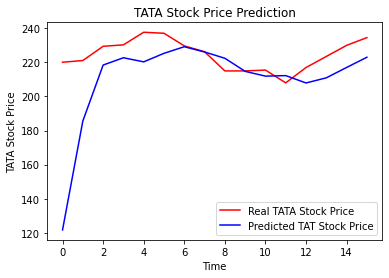

In [16]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()